In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pingouin as pg
%matplotlib inline

In [2]:
data = pd.read_csv('escape.csv')

In [4]:
data.head()

,Song_Type,Songwriter,Screams
0,1,1,5
1,1,1,7
2,1,1,3
3,1,1,5
4,1,1,7


In [7]:
data.groupby(['Songwriter','Song_Type'])['Screams'].describe()

count      mean       std  min  25%   50%   75%   max
Songwriter Song_Type                                                       
0          0           17.0  7.058824  1.748949  4.0  6.0   7.0   8.0  11.0
           1           17.0  6.000000  1.968502  3.0  5.0   6.0   7.0  11.0
1          0           17.0  9.529412  1.736291  7.0  8.0  10.0  10.0  13.0
           1           17.0  6.411765  2.063335  3.0  5.0   6.0   7.0  11.0

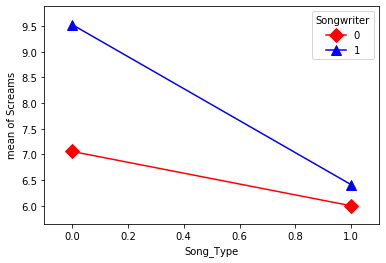

In [9]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(data.Song_Type, data.Songwriter, data.Screams,
             colors=['red','blue'], markers=['D','^'], ms=10)

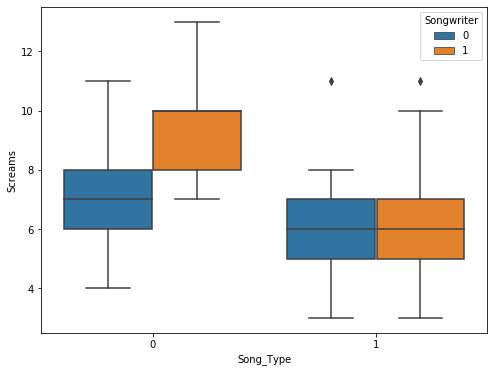

In [11]:
plt.figure(figsize=(8,6))
_ = sns.boxplot(x='Song_Type', y='Screams', hue='Songwriter', data=data)

In [13]:
pg.homoscedasticity(data, dv='Screams',group='Songwriter')

,W,pval,equal_var
levene,2.078231,0.154142,True


In [14]:
pg.homoscedasticity(data, dv='Screams',group='Song_Type')

,W,pval,equal_var
levene,0.188658,0.665453,True


In [15]:
data['interaction'] = 0

In [17]:
unique_list = [1,2,3,4]
unique_list

[1, 2, 3, 4]

In [18]:
for i in range(4):
    for j in range(17):
        data.at[17*i+j,'interaction'] = unique_list[i]

In [20]:
# Levene test across interaction variables
pg.homoscedasticity(data, dv='Screams',group='interaction')

,W,pval,equal_var
levene,0.256293,0.856575,True


### A non-significant result like the one we have here, W(3, 64) = .256, p = .857, is indicative of the assumption being met.

In [21]:
m01 = smf.ols('Screams~C(Songwriter)*C(Song_Type)', data=data).fit()
m01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Screams   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     11.96
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           2.58e-06
Time:                        10:12:46   Log-Likelihood:                -137.52
No. Observations:                  68   AIC:                             283.0
Df Residuals:                      64   BIC:                             291.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                7.0588      0.457     15.444      0.000       6.146       7.972
C(Songwriter)[T.1]                       2.4706      0.646      3.822      0.000       1.179       3.762
C(Song_Type)[T.1]                       -1.0588      0.646     -1.638      0.106      -2.350       0.232
C(Songwriter)[T.1]:C(Song_Type)[T.1]    -2.0588      0.914     -2.252      0.028      -3.885      -0.233
==============================================================================
Omnibus:                        3.295   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                2.660
Skew:                           0.476   Prob(JB):                        0.264
Kurtosis:                       3.178   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

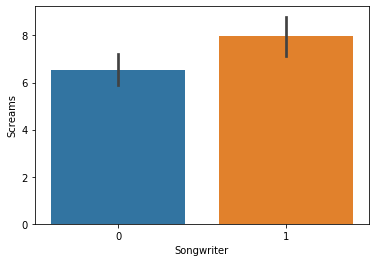

In [25]:
_ = sns.barplot(x='Songwriter', y='Screams', data=data)

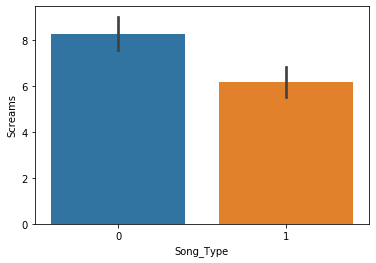

In [26]:
_ = sns.barplot(x='Song_Type', y='Screams', data=data)

In [33]:
contrast_writer = np.array([[1,-1]])
contrast_writer =contrast_writer.reshape(2,1)
contrast_writer

array([[ 1],
       [-1]])

In [34]:
contrast_type = np.array([[1,-1]])
contrast_type =contrast_type.reshape(2,1)
contrast_type

array([[ 1],
       [-1]])

In [35]:
m02 = smf.ols('Screams~C(Songwriter, contrast_writer)*C(Song_Type, contrast_type)', data=data).fit()
m02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Screams   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     11.96
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           2.58e-06
Time:                        10:24:37   Log-Likelihood:                -137.52
No. Observations:                  68   AIC:                             283.0
Df Residuals:                      64   BIC:                             291.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                        7.2500      0.229     31.724      0.000       6.793       7.707
C(Songwriter, contrast_writer)[custom0]                                         -0.7206      0.229     -3.153      0.002      -1.177      -0.264
C(Song_Type, contrast_type)[custom0]                                             1.0441      0.229      4.569      0.000       0.588       1.501
C(Songwriter, contrast_writer)[custom0]:C(Song_Type, contrast_type)[custom0]    -0.5147      0.229     -2.252      0.028      -0.971      -0.058
==============================================================================
Omnibus:                        3.295   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                2.660
Skew:                           0.476   Prob(JB):                        0.264
Kurtosis:                       3.178   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
data.groupby('Songwriter')['Screams'].describe()

,count,mean,std,min,25%,50%,75%,max
Songwriter,,,,,,,,
0,34.0,6.529412,1.910661,3.0,5.25,7.0,7.0,11.0
1,34.0,7.970588,2.455486,3.0,6.25,8.0,10.0,13.0


In [37]:
data.groupby('Song_Type')['Screams'].describe()

,count,mean,std,min,25%,50%,75%,max
Song_Type,,,,,,,,
0,34.0,8.294118,2.125308,4.0,7.0,8.0,10.0,13.0
1,34.0,6.205882,1.996655,3.0,5.0,6.0,7.0,11.0


In [38]:
sm.stats.anova_lm(m02,typ=3)

,sum_sq,df,F,PR(>F)
Intercept,3574.250000,1.0,1006.414079,7.281568e-41
"C(Songwriter, contrast_writer)",35.308824,1.0,9.942029,2.459547e-03
"C(Song_Type, contrast_type)",74.132353,1.0,20.873706,2.293327e-05
"C(Songwriter, contrast_writer):C(Song_Type, contrast_type)",18.014706,1.0,5.072464,2.774678e-02
Residual,227.294118,64.0,NaN,NaN


In [39]:
prediction = pd.DataFrame(m01.fittedvalues)
prediction.columns = ['predicted'] 
prediction.tail()

,predicted
63,7.058824
64,7.058824
65,7.058824
66,7.058824
67,7.058824


In [40]:
prediction['standarized_prediction']  = (prediction['predicted']-prediction['predicted'].mean())/prediction['predicted'].std()

In [41]:
import statsmodels.stats.outliers_influence as sms

In [42]:
summary_frame = sms.OLSInfluence(m01).summary_frame()

In [43]:
summary_frame = pd.merge(summary_frame, prediction, how = 'inner', left_index = True, right_index = True)

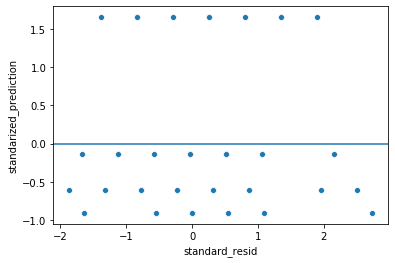

In [44]:
_ = sns.scatterplot(x = 'standard_resid', y='standarized_prediction', data = summary_frame)
_ = plt.axhline(y=0)

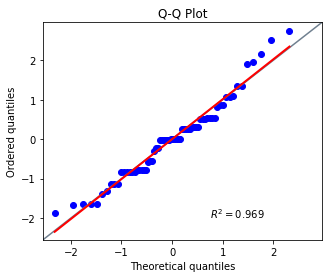

In [45]:
_ = pg.qqplot(summary_frame['standard_resid'], confidence=False)

In [46]:
sm.stats.anova_lm(m01)

,df,sum_sq,mean_sq,F,PR(>F)
C(Songwriter),1.0,35.308824,35.308824,9.942029,0.002460
C(Song_Type),1.0,74.132353,74.132353,20.873706,0.000023
C(Songwriter):C(Song_Type),1.0,18.014706,18.014706,5.072464,0.027747
Residual,64.0,227.294118,3.551471,NaN,NaN


In [47]:
# a is the number of levels of the first independent variable
# b is the number of levels of the second independent variable 
# n is the number of people per condition.
def Omega_factorial(n,a,b, MSa, MSb, MSab, MSr):
    varA = ((a-1)*(MSa-MSr))/(n*a*b)
    varB = ((b-1)*(MSb-MSr))/(n*a*b)
    varAB = ((a-1)*(b-1)*(MSab-MSr))/(n*a*b)
    varTotal = varA+varB+varAB+MSr
    print("Omega-Squared A: ", varA/varTotal)
    print("Omega-Squared B: ", varB/varTotal)
    print("Omega-Squared AB: ", varAB/varTotal)

In [48]:
Omega_factorial(17, 2, 2, 35.31, 74.13, 18.01, 3.55)

Omega-Squared A:  0.08866554997208265
Omega-Squared B:  0.19704075935231713
Omega-Squared AB:  0.040368509212730316


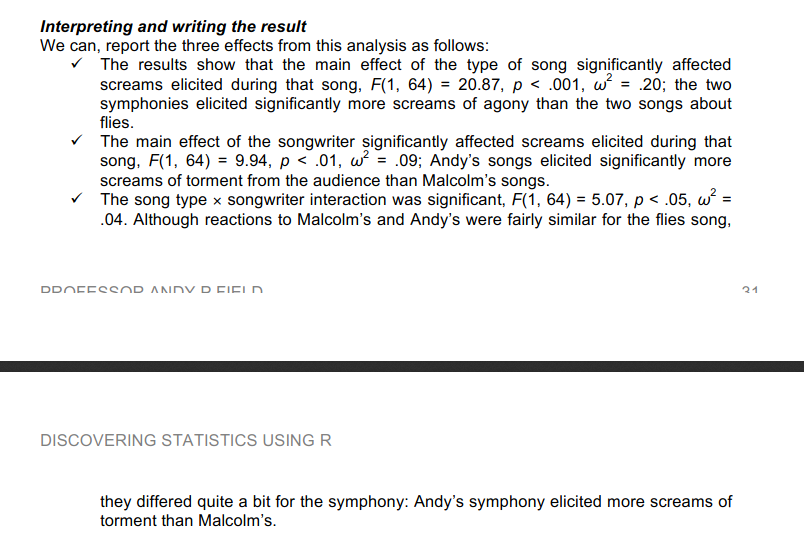

In [49]:
from IPython.display import Image
Image('screams.png')